# Data Understanding and Preparation 

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from textblob import TextBlob
import nltk
import yfinance as yf
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# Download the required NLTK resources


# Downloading the necessary NLTK data
# loading data 
file_path = r"C:\Users\ethio\Desktop\Tenx.AIM2 -ET\Week1\Data\raw_analyst_ratings.csv"

df=pd.read_csv(file_path)
print(df.columns.tolist())
df.head()


['Unnamed: 0', 'headline', 'url', 'publisher', 'date', 'stock']


,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


The unnamed column doesn't contribute any useful information beyond the row count. Before removing it, let's review 
the last few rows of the dataset.

In [11]:
print (df.tail(1))

         Unnamed: 0                                           headline  \
1407327     1413848  China Zenix Auto International Opens For Tradi...   

                                                       url      publisher  \
1407327  https://www.benzinga.com/news/ipos/11/05/10789...  Allie Wickman   

                        date stock  
1407327  2011-05-12 00:00:00    ZX  


As observed, the unnamed column does not add value beyond indicating the number of rows and can therefore be considered redundant.

In [12]:

df = df.drop(columns=['Unnamed: 0'])
# Verify the DataFrame after dropping the column
print("\nUpdated column names in the dataset:")
print(df.columns.tolist())
print("\nFirst few rows of the updated dataset:")
df.head()


Updated column names in the dataset:
['headline', 'url', 'publisher', 'date', 'stock']

First few rows of the updated dataset:


,headline,url,publisher,date,stock
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


# Data Cleaning 
Address missing values, identify and remove duplicates, and verify that all text is properly formatted (e.g., dates are in the correct format)
As it can be seen from the table the data column is in "%Y-%m-%d %H:%M:%S%z" format, and also converting the headlines to lowercase

In [13]:
# Check for missing values in the dataset
print("Missing values in each column:")
print(df.isnull().sum())
# Identify duplicate rows
print("Number of duplicate rows:")
print(df.duplicated().sum())
# Remove duplicate rows
df = df.drop_duplicates()
print("Remove duplicate rows:")
print(df.duplicated().sum())
date_format = "%Y-%m-%d %H:%M:%S%z"  
df['date'] = pd.to_datetime(df['date'], format=date_format, errors='coerce')
# Convert all headlines to lowercase to ensure consistency, as variations in case (e.g., "U" vs. "u") can affect text analysis.

df['headline'] = df['headline'].str.lower()
date_format = "%Y-%m-%d %H:%M:%S%z"
df.head()

Missing values in each column:
headline     0
url          0
publisher    0
date         0
stock        0
dtype: int64
Number of duplicate rows:
1
Remove duplicate rows:
0


,headline,url,publisher,date,stock
0,stocks that hit 52-week highs on friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,stocks that hit 52-week highs on wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,71 biggest movers from friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,46 stocks moving in friday's mid-day session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,b of a securities maintains neutral on agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


# Descriptive Statistics
 After data cleansing, better to perform descriptive statistics, such as analyzing headline lengths. 
 Then count the number of articles per publisher to identify the most active ones and examine
 publication dates to identify trends over time


In [14]:
df['headline_length'] = df['headline'].str.len()

# descriptive statistics for headline lengths
headline_length_D_stats = df['headline_length'].describe()
print("Descriptive statistics for headline lengths:")
print(headline_length_D_stats)


Descriptive statistics for headline lengths:
count    1.407327e+06
mean     7.312054e+01
std      4.073532e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


In [15]:
# Count the number of articles per publisher
publisher_counts = df['publisher'].value_counts()
print("\nNumber of articles per publisher:")
print(publisher_counts)



Number of articles per publisher:
publisher
Paul Quintaro        228373
Lisa Levin           186978
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
                      ...  
MoneyGeek                 1
muathe                    1
Robert Morris             1
LeftCoastHedgie           1
Jeremie Capron            1
Name: count, Length: 1034, dtype: int64


In [16]:
# Count articles per day
df['date'] = pd.to_datetime(df['date'])
daily_counts = df['date'].dt.date.value_counts().sort_index()
print("\nDaily publication counts:")
print(daily_counts)

# Get the minimum and maximum dates
min_date = df['date'].min()
max_date = df['date'].max()

print(f"Minimum Date: {min_date}")
print(f"Maximum Date: {max_date}")



Daily publication counts:
date
2011-04-27      1
2011-04-28      2
2011-04-29      2
2011-04-30      1
2011-05-01      1
             ... 
2020-06-07     25
2020-06-08    765
2020-06-09    804
2020-06-10    806
2020-06-11    544
Name: count, Length: 2528, dtype: int64
Minimum Date: 2011-04-27 21:01:48-04:00
Maximum Date: 2020-06-11 17:12:35-04:00



To analyze trends over time in publication dates, including increased news frequency on specific days or during particular events, we should plot the number of publications we can observe and understand the overall trends more effectively. Additionally, marking major events in the plots will help highlight significant changes in publication frequency

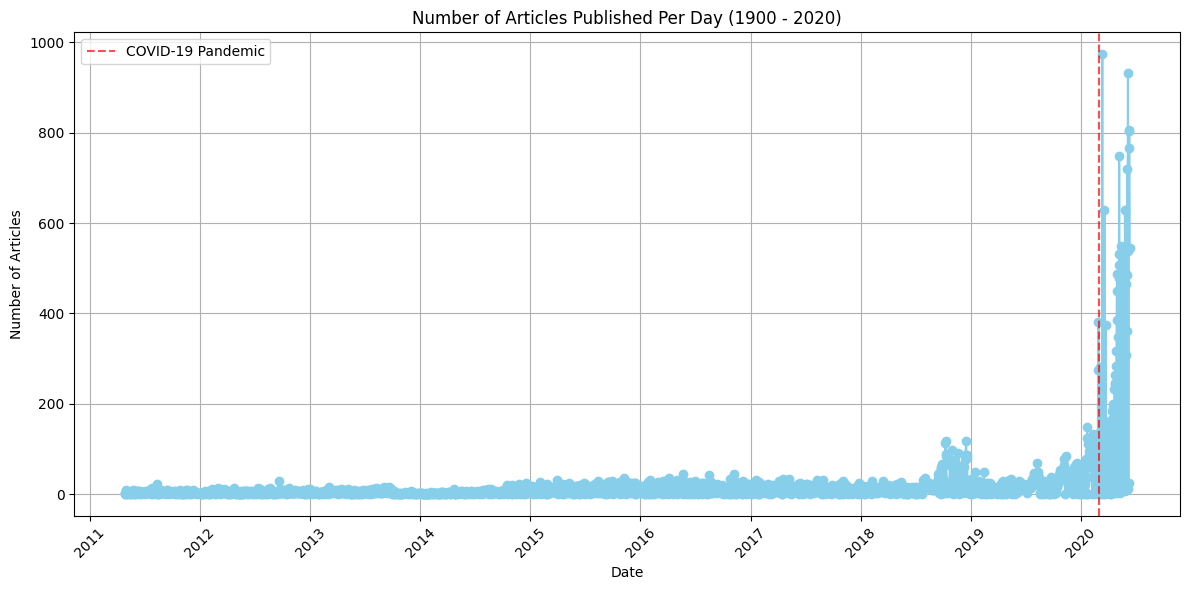

In [17]:
# Filter dates between 1900 and 2020
df = df[(df['date'] >= '1900-01-01') & (df['date'] <= '2020-12-31')]

# Extract date components
df['date'] = df['date'].dt.date
#%Y-%m-%d %H:%M:%S%z
# Count the number of articles published per day
date_format = "%Y-%m-%d %H:%M:%S"
df['date'] = pd.to_datetime(df['date'], format=date_format, errors='coerce')

# Group by date and count the number of articles
articles_per_day = df.groupby('date').size()

# Define major events
major_events = {
   
    'COVID-19 Pandemic': pd.Timestamp('2020-03-01'),
   
}

# Plot the number of articles published per day
plt.figure(figsize=(12, 6))
plt.plot(articles_per_day.index, articles_per_day.values, marker='o', color='skyblue')
plt.title('Number of Articles Published Per Day (1900 - 2020)')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.grid(True)

# Add vertical lines for major events
for event, date in major_events.items():
    if date in articles_per_day.index:
        plt.axvline(date, color='red', linestyle='--', alpha=0.7, label=event)

# Add legend and format x-axis labels
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()

# Print the first few rows of the DataFrame
#df.head()

As it can be seen on the graph their is a significant increase in publication on the year 2020 this might be because of COVID 19 out brake

# Text Analysis (Sentiment analysis & Topic Modeling):

To perform sentiment analysis on headlines. we can use pre-built libraries like VADER,so we have to install the necessary package. 


In [18]:

import nltk 
#nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()
def analyze_sentiment(text):
    sentiment_scores = sid.polarity_scores(text)
    compound_score = sentiment_scores['compound']
    return 'positive' if compound_score > 0.05 else ('negative' if compound_score < -0.05 else 'neutral')
df['sentiment'] = df['headline'].apply(analyze_sentiment)
df.head()

,headline,url,publisher,date,stock,headline_length,sentiment
0,stocks that hit 52-week highs on friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05,A,39,neutral
1,stocks that hit 52-week highs on wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03,A,42,neutral
2,71 biggest movers from friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26,A,29,neutral
3,46 stocks moving in friday's mid-day session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22,A,44,neutral
4,b of a securities maintains neutral on agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22,A,87,positive


To identify common keywords or phrases, potentially extracting topics or significant events (like "FDA approval", "price target", etc.). First preprocess the text data then extract keywords or phrases , finally " Topic Modeling" (finding significant topics in the data)

Topic Modeling 